e:\3RD YEAR\6th Sem\PE 3 & 4\NLP\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
e:\3RD YEAR\6th Sem\PE 3 & 4\NLP\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
e:\3RD YEAR\6th Sem\PE 3 & 4\NLP\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
e:\3RD YEAR\6th Sem\PE 3 & 4\NLP\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE: 3.3587172451131826
RMSE: 4.199349608137198
MAPE: 231.3488209487846


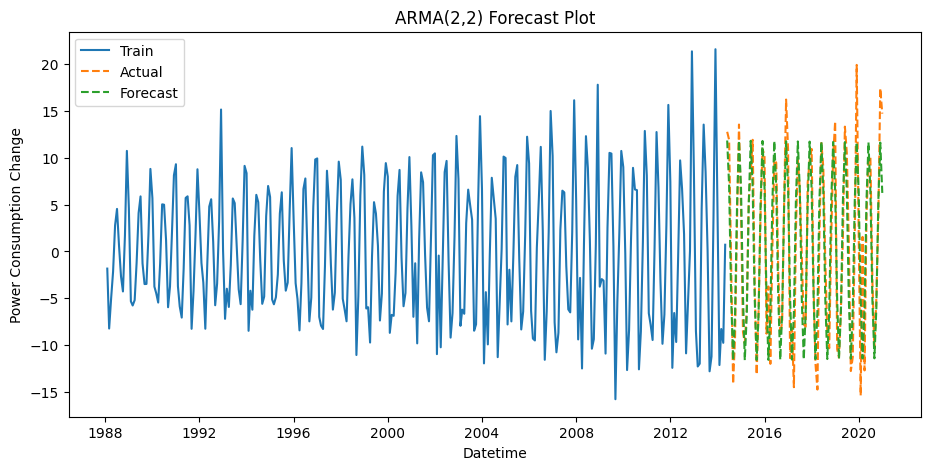

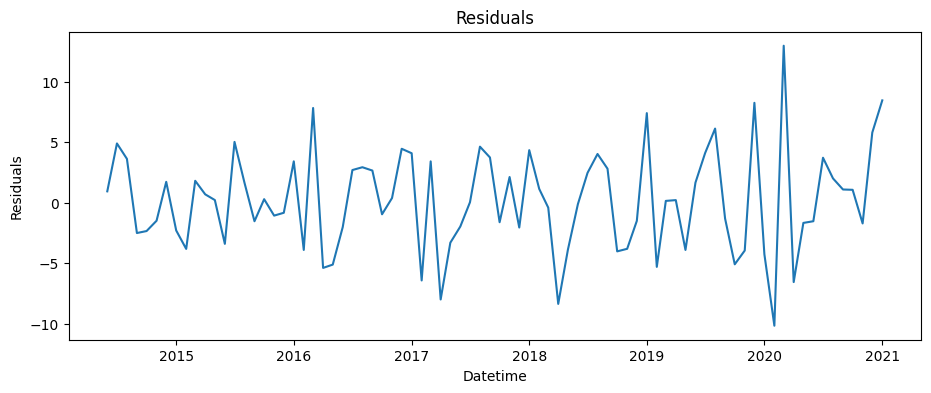

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset
df = pd.read_csv("ML471_S2_Datafile_Concept(in).csv")

# Datetime preprocessing
df["Datetime"] = pd.to_datetime(df["Datetime"])
df.set_index("Datetime", inplace=True)

# Handle missing values
df.dropna(inplace=True)

# Target variable (already differenced)
y = df["Power_Consumption_diff"]

# Train-test split (80-20)
split = int(len(y) * 0.8)
train, test = y[:split], y[split:]

# Fit ARMA(2,2) -> ARIMA(2,0,2)
model = ARIMA(train, order=(2, 0, 2))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Evaluation metrics
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = np.mean(np.abs((test - forecast) / test)) * 100

print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape)

# Forecast plot
plt.figure(figsize=(11, 5))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Actual", linestyle="--")
plt.plot(test.index, forecast, label="Forecast", linestyle="--")
plt.title("ARMA(2,2) Forecast Plot")
plt.xlabel("Datetime")
plt.ylabel("Power Consumption Change")
plt.legend()
plt.show()

# Residual plot
residuals = test - forecast

plt.figure(figsize=(11, 4))
plt.plot(residuals)
plt.title("Residuals")
plt.xlabel("Datetime")
plt.ylabel("Residuals")
plt.show()
